Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: https://github.com/Kaloy2202/jupyter_notebook.git

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# %matplotlib inline

In [17]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [19]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

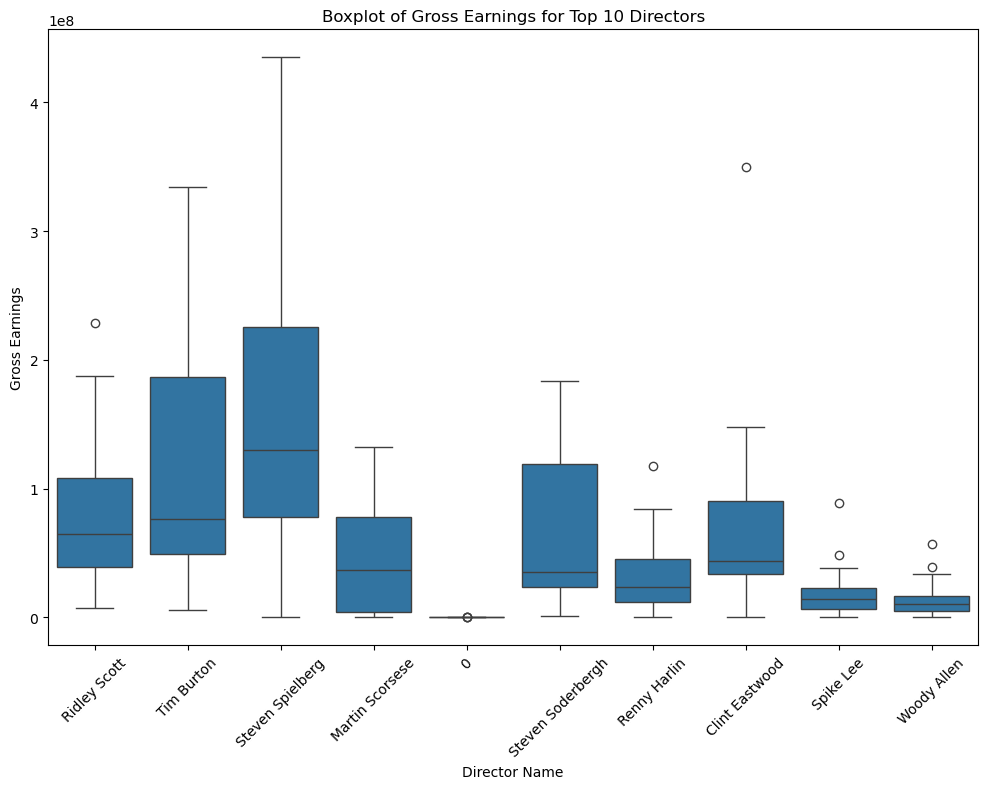

In [21]:
director_stats = data.groupby('director_name').agg(
    movie_count=('movie_title', 'size'),
    total_gross=('gross', 'sum')
).reset_index()

# Sort the directors by the number of movies directed in descending order
top_directors = director_stats.sort_values(by='movie_count', ascending=False).head(10)

# Filter the original DataFrame for only the top 10 directors
top_directors_list = top_directors['director_name'].tolist()
top_directors_df = data[data['director_name'].isin(top_directors_list)]

# Create a boxplot for the gross earnings of the top 10 directors
plt.figure(figsize=(12, 8))
sns.boxplot(x='director_name', y='gross', data=top_directors_df)
plt.xticks(rotation=45)
plt.title('Boxplot of Gross Earnings for Top 10 Directors')
plt.ylabel('Gross Earnings')
plt.xlabel('Director Name')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

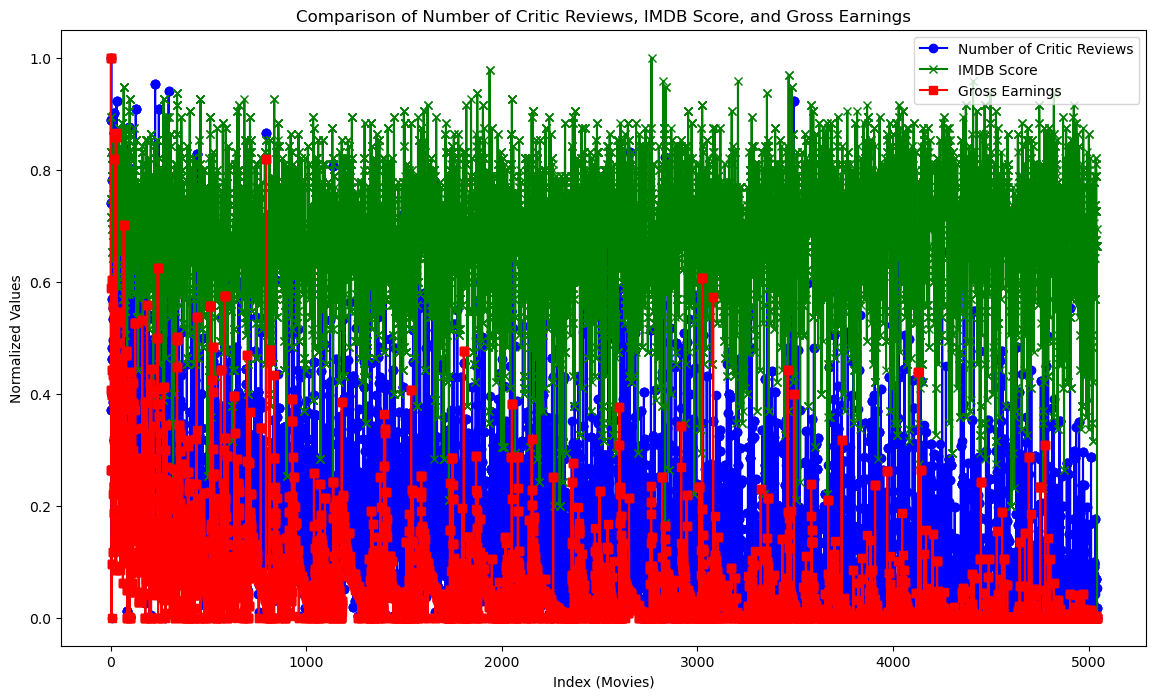

In [47]:
# Normalize the data
data_normalized = data.copy()
data_normalized['num_critic_for_reviews'] = (data['num_critic_for_reviews'] - data['num_critic_for_reviews'].min()) / (data['num_critic_for_reviews'].max() - data['num_critic_for_reviews'].min())
data_normalized['imdb_score'] = (data['imdb_score'] - data['imdb_score'].min()) / (data['imdb_score'].max() - data['imdb_score'].min())
data_normalized['gross'] = (data['gross'] - data['gross'].min()) / (data['gross'].max() - data['gross'].min())

# Plotting the variables with normalized data
plt.figure(figsize=(14, 8))

# Plot num_critic_for_reviews
plt.plot(data.index, data_normalized['num_critic_for_reviews'], label='Number of Critic Reviews', color='blue', marker='o')

# Plot imdb_score
plt.plot(data.index, data_normalized['imdb_score'], label='IMDB Score', color='green', marker='x')

# Plot gross
plt.plot(data.index, data_normalized['gross'], label='Gross Earnings', color='red', marker='s')

# Add title and labels
plt.title('Comparison of Number of Critic Reviews, IMDB Score, and Gross Earnings')
plt.xlabel('Index (Movies)')
plt.ylabel('Normalized Values')

# Show legend
plt.legend()

# Display the plot
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [49]:
# Compute Sales (Gross - Budget)
data['sales'] = data['gross'] - data['budget']

# Display the first few rows to verify the new column
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,average_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0


## Which directors garnered the most total sales?

In [53]:
# Group by director name and sum the total sales
director_sales = data.groupby('director_name')['sales'].sum().reset_index()

# Sort the directors by total sales in descending order
top_director_sales = director_sales.sort_values(by='sales', ascending=False).head(1)

# Display the top directors by total sales
print(top_director_sales)

         director_name         sales
2159  Steven Spielberg  6.386398e+09


## Plot sales and average likes as a scatterplot. Fit it with a line.

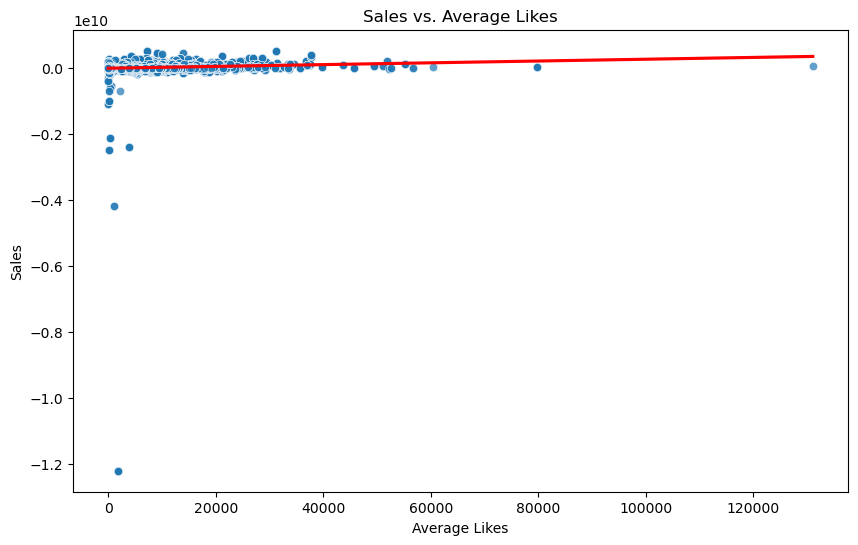

In [55]:
# Compute Average Likes
data['average_likes'] = (data['director_facebook_likes'] + data['actor_1_facebook_likes'] + data['actor_2_facebook_likes'] + data['actor_3_facebook_likes'] + data['movie_facebook_likes']) / 5

# Plot Sales vs. Average Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_likes', y='sales', data=data, alpha=0.7)

# Fit a line using linear regression
sns.regplot(x='average_likes', y='sales', data=data, scatter=False, color='red')

plt.title('Sales vs. Average Likes')
plt.xlabel('Average Likes')
plt.ylabel('Sales')
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

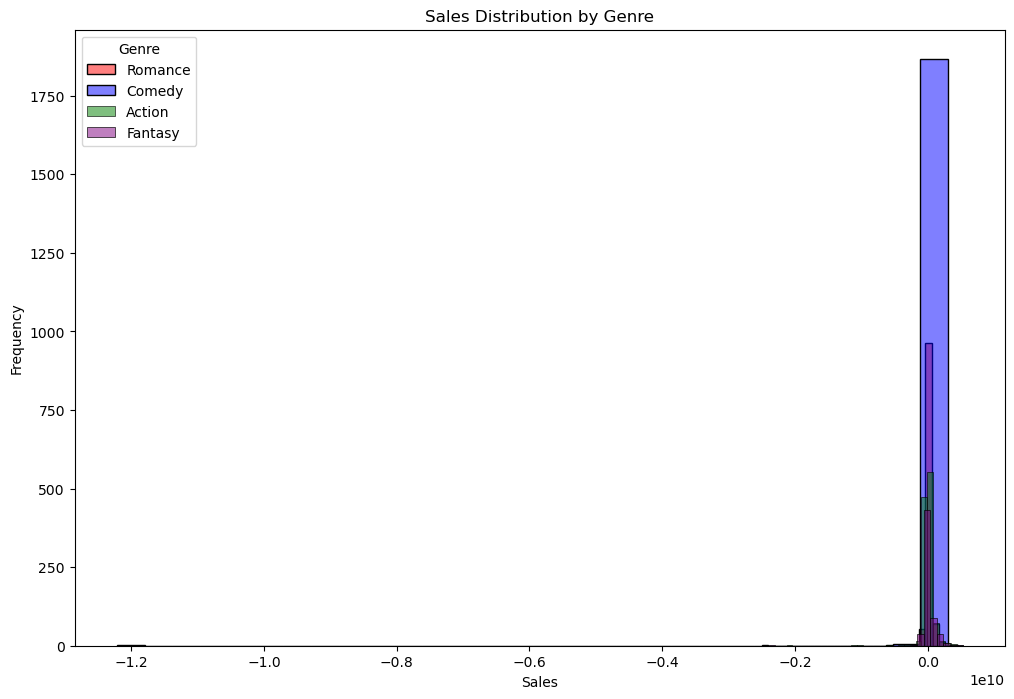

In [61]:
# Assuming the 'genres' column contains genres separated by '|'
data['genres'] = data['genres'].str.split('|')
data = data.explode('genres')

# Filter the data to include only the genres of interest
genres_of_interest = ['Romance', 'Comedy', 'Action', 'Fantasy']
filtered_data = data[data['genres'].isin(genres_of_interest)]

# Plot Sales for Different Genres
plt.figure(figsize=(12, 8))

colors = {'Romance': 'red', 'Comedy': 'blue', 'Action': 'green', 'Fantasy': 'purple'}

for genre in genres_of_interest:
    genre_sales = filtered_data[filtered_data['genres'] == genre]['sales']
    sns.histplot(genre_sales, label=genre, kde=False, alpha=0.5, bins=30, color=colors[genre])

plt.title('Sales Distribution by Genre')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend(title='Genre')
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [63]:
# Compute the average likes of the three actors
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

# Display the updated DataFrame with the new column
data.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,average_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0,930.333333
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0,930.333333
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0,930.333333
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9312.6,9404152.0,15333.333333


## Copying the whole dataframe

In [65]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,average_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0,930.333333
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0,930.333333
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0,930.333333
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,7158.2,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9312.6,9404152.0,15333.333333


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [118]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max Normalization
for col in numeric_cols:
    min_value = df[col].min()
    max_value = df[col].max()
    if max_value != min_value:  # Avoid division by zero
        df[col] = (df[col] - min_value) / (max_value - min_value)
    else:
        df[col] = 0  # If all values are the same, normalize to 0

# Display the first few rows of the normalized DataFrame
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.054619,0.004261
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.054619,0.004261
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.054619,0.004261
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.054619,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.071058,0.070229
